In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('CarPrice_Assignment.csv')  
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [490]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [492]:
df.duplicated().sum()

0

In [494]:
# Drop car_ID and CarName (not useful for regression)
df = df.drop(['car_ID', 'CarName'], axis=1)

In [496]:
df.shape

(205, 24)

In [498]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [500]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


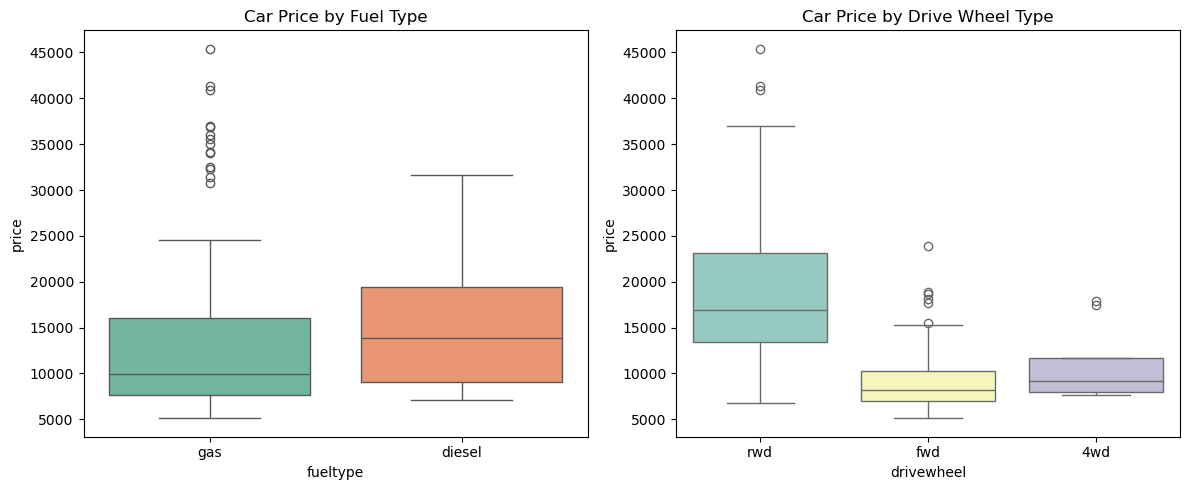

In [502]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='fueltype', y='price', hue='fueltype', palette='Set2', legend=False)
plt.title('Car Price by Fuel Type')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='drivewheel', y='price', hue='drivewheel', palette='Set3', legend=False)
plt.title('Car Price by Drive Wheel Type')

plt.tight_layout()
plt.show()

In [503]:
df = pd.get_dummies(df, columns=['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation','enginetype', 'cylindernumber', 'fuelsystem'])
df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,True,False,False
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,True,False,False
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,False,False,False,False,False,False,False,True,False,False
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,False,False,False,False,False,False,False,True,False,False
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,False,False,False,False,False,False,False,True,False,False


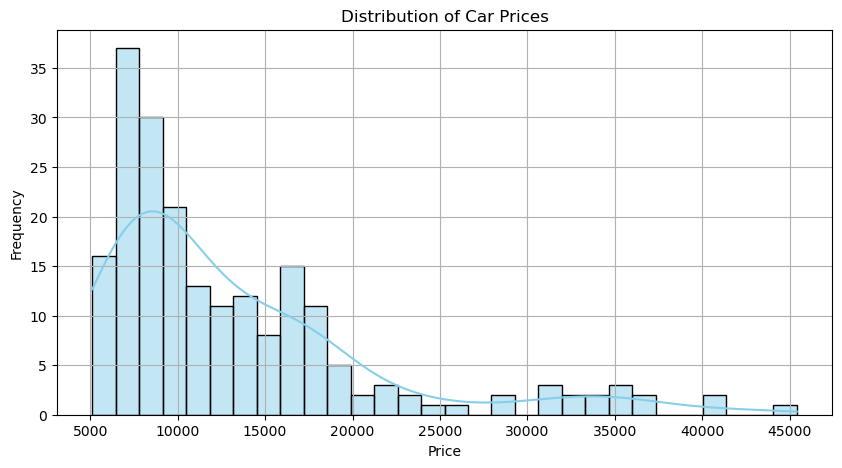

In [506]:
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

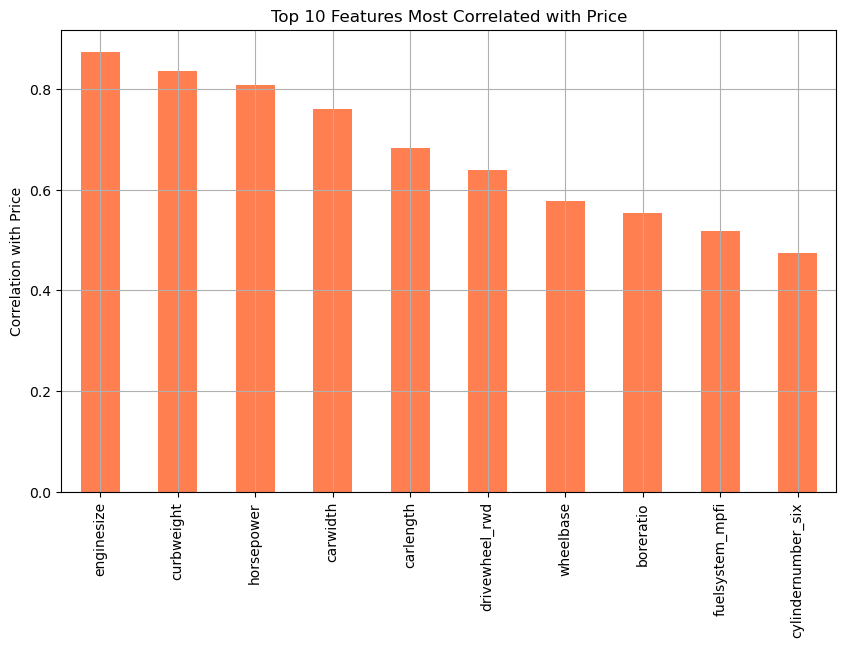

In [508]:
correlations = df_cleaned.corr()['price'].sort_values(ascending=False)[1:11]
plt.figure(figsize=(10, 6))
correlations.plot(kind='bar', color='coral')
plt.title('Top 10 Features Most Correlated with Price')
plt.ylabel('Correlation with Price')
plt.grid(True)
plt.show()

In [510]:
# Find feature most correlated with price
top_feature = df_cleaned.corr()['price'].drop('price').abs().sort_values(ascending=False).idxmax()
print("Top feature most correlated with price:", top_feature)

Top feature most correlated with price: enginesize


<h1>Simple Linear Reg.</h1>


Simple Linear Regression Results:
MSE: 0.056322743109347304
R² Score: 0.7924162701309406


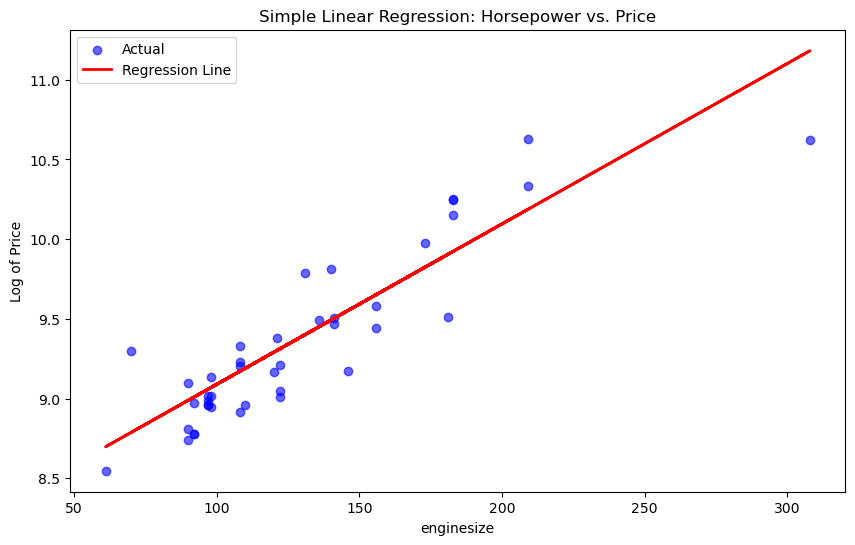

In [513]:
# Feature and target
X = df[['enginesize']]  
y = np.log(df['price'])  

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train model
model_simple = LinearRegression()
model_simple.fit(X_train, y_train)

# Predictions
y_pred_simple = model_simple.predict(X_test)

# Evaluate model
mse_simple = mean_squared_error(y_test, y_pred_simple)
r2_simple = r2_score(y_test, y_pred_simple)

print("\nSimple Linear Regression Results:")
print("MSE:", mse_simple)
print("R² Score:", r2_simple)

# Plot regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='Actual')
plt.plot(X_test, y_pred_simple, color='red', linewidth=2, label='Regression Line')
plt.xlabel('enginesize')
plt.ylabel('Log of Price')
plt.title('Simple Linear Regression: Horsepower vs. Price')
plt.legend()
plt.show()

<h1>Multi. Reg.</h1>

In [516]:
# Multiple Linear Regression
# take first 5
X = df[['enginesize', 'horsepower', 'curbweight', 'carwidth', 'carlength']]
y = np.log(df['price'])  # Log-transform the target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the model
model_multiple = LinearRegression().fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_multiple = model_multiple.predict(X_test_scaled)
mse_multiple = mean_squared_error(y_test, y_pred_multiple)
r2_multiple = r2_score(y_test, y_pred_multiple)

print("Multiple Linear Regression Results:")
print("MSE:", mse_multiple)
print("R² Score:", r2_multiple)

Multiple Linear Regression Results:
MSE: 0.028102656202049898
R² Score: 0.8964245370236377


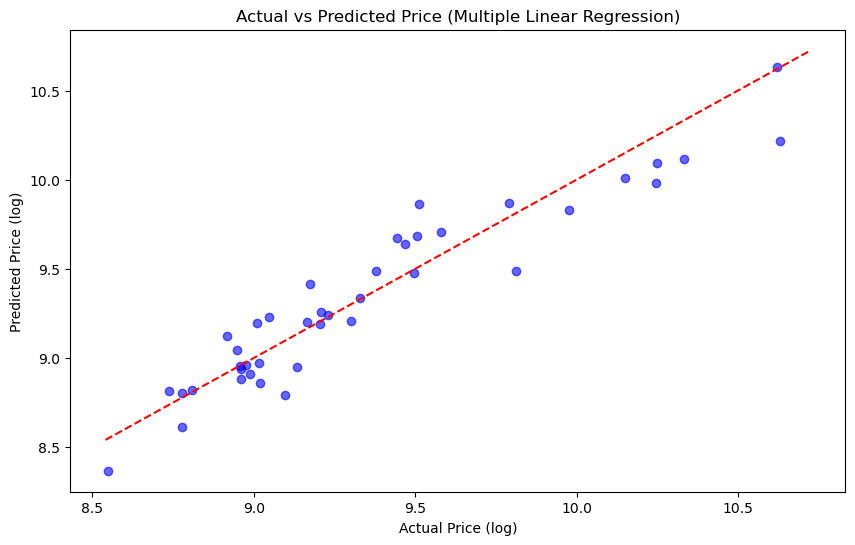

In [518]:
# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_multiple, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Price (log)')
plt.ylabel('Predicted Price (log)')
plt.title('Actual vs Predicted Price (Multiple Linear Regression)')
plt.show()

<h1>Poly. Reg.</h1>

Degree 2 Polynomial Regression Results:
MSE: 0.052244405861782285
R² Score: 0.8074474353543717
--------------------------------------------------
Degree 3 Polynomial Regression Results:
MSE: 0.04739764905433072
R² Score: 0.8253106962737795
--------------------------------------------------
Degree 4 Polynomial Regression Results:
MSE: 0.045974252873128264
R² Score: 0.8305567811067169
--------------------------------------------------


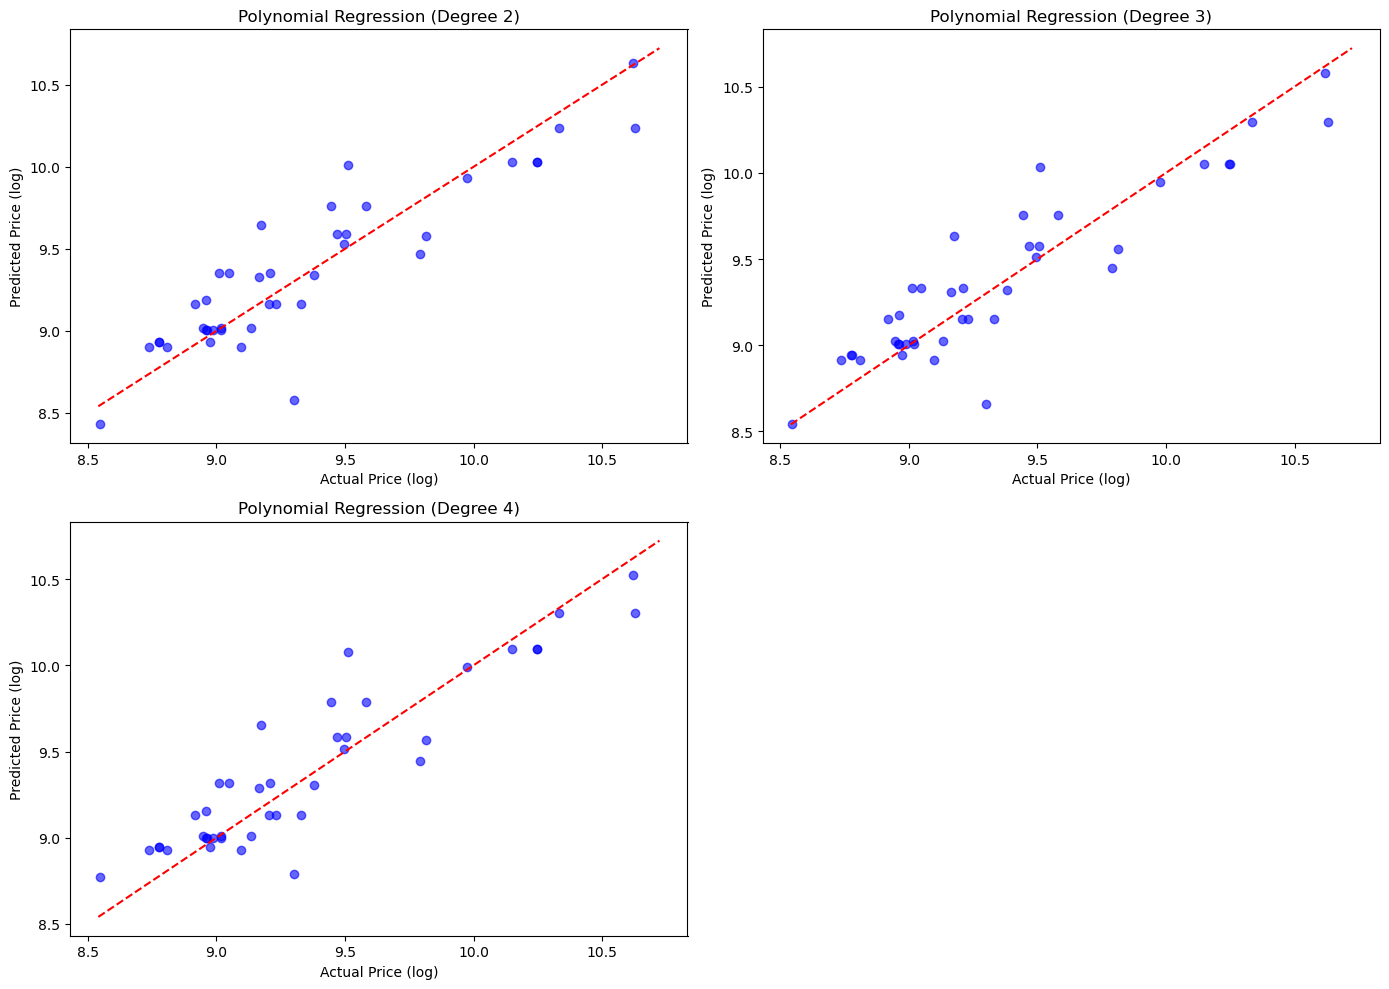

In [521]:
# Polynomial Regression using 'enginesize'
X = df[['enginesize']]
y = np.log(df['price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.figure(figsize=(14, 10))
degrees = [2, 3, 4]

for i, degree in enumerate(degrees, 1):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model_poly = LinearRegression().fit(X_train_poly, y_train)

    y_pred_poly = model_poly.predict(X_test_poly)

    mse_poly = mean_squared_error(y_test, y_pred_poly)
    r2_poly = r2_score(y_test, y_pred_poly)

    plt.subplot(2, 2, i)
    plt.scatter(y_test, y_pred_poly, color='blue', alpha=0.6)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.xlabel('Actual Price (log)')
    plt.ylabel('Predicted Price (log)')

    print(f"Degree {degree} Polynomial Regression Results:")
    print(f"MSE: {mse_poly}")
    print(f"R² Score: {r2_poly}")
    print('-' * 50)

plt.tight_layout()
plt.show()